# Wildifre Plus

## Import Libraries

In [40]:
# load packages

# system packages
import os
import wget

# analytical packages
import pandas as pd

# data viz packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and Prepare Dataset

In [7]:
# load dataset - download directly from source, save to data directory

file_name = "data/forestfires.csv"
output_dir = "data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

if not os.path.isfile(file_name):
    file_name = wget.download(url, out=output_dir)

In [35]:
df = pd.read_csv(file_name)

## Exploratory Data Analysis

### Data Insights

In [13]:
# take a look at the shape of the data
df.shape

(517, 13)

In [14]:
# take a look at a sample of rows
df.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
400,9,5,jun,wed,93.3,49.5,297.7,14.0,28.0,34,4.5,0.0,8.16
160,7,4,mar,mon,90.1,39.7,86.6,6.2,16.1,29,3.1,0.0,1.75
358,6,3,sep,fri,92.5,122.0,789.7,10.2,19.7,39,2.7,0.0,0.00
18,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.00
180,1,3,sep,sun,92.4,124.1,680.7,8.5,23.9,32,6.7,0.0,5.33


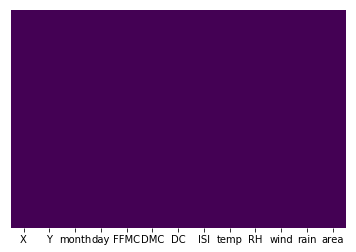

In [17]:
# see if there are any missing values by feature
# missing values show up in yellow
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Summary Statistics

In [18]:
# take a look at summary statistics of dataset
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Correlations

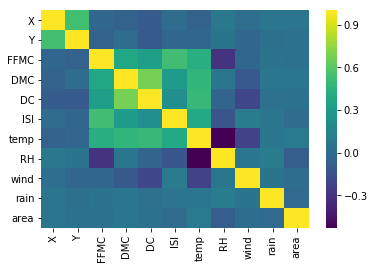

In [29]:
# are any of the variables correlated
sns.heatmap(df.corr(), cmap = 'viridis')

### Histograms

#### Target Variable - Area

Text(0.5, 1.0, 'Histogram of Area of Fire')

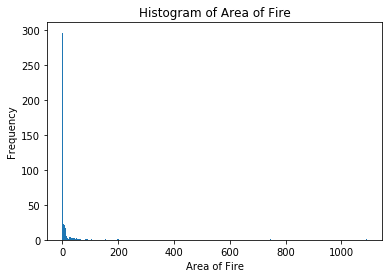

In [21]:
# look at distribution of fire area variable
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(x=df['area'], bins='auto')
                                 
ax1.set_xlabel('Area of Fire')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Area of Fire')

Text(0.5, 1.0, 'Histogram of Area of Fire')

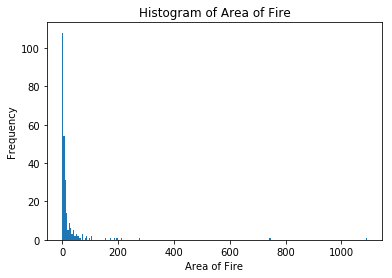

In [30]:
# look at distribution of fire area where area > 0
df_area = df[df.area > 0]

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(x=df_area['area'], bins='auto')
                                 
ax2.set_xlabel('Area of Fire')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Area of Fire')

#### Independent Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6e8eefe80>,
      dtype=object)

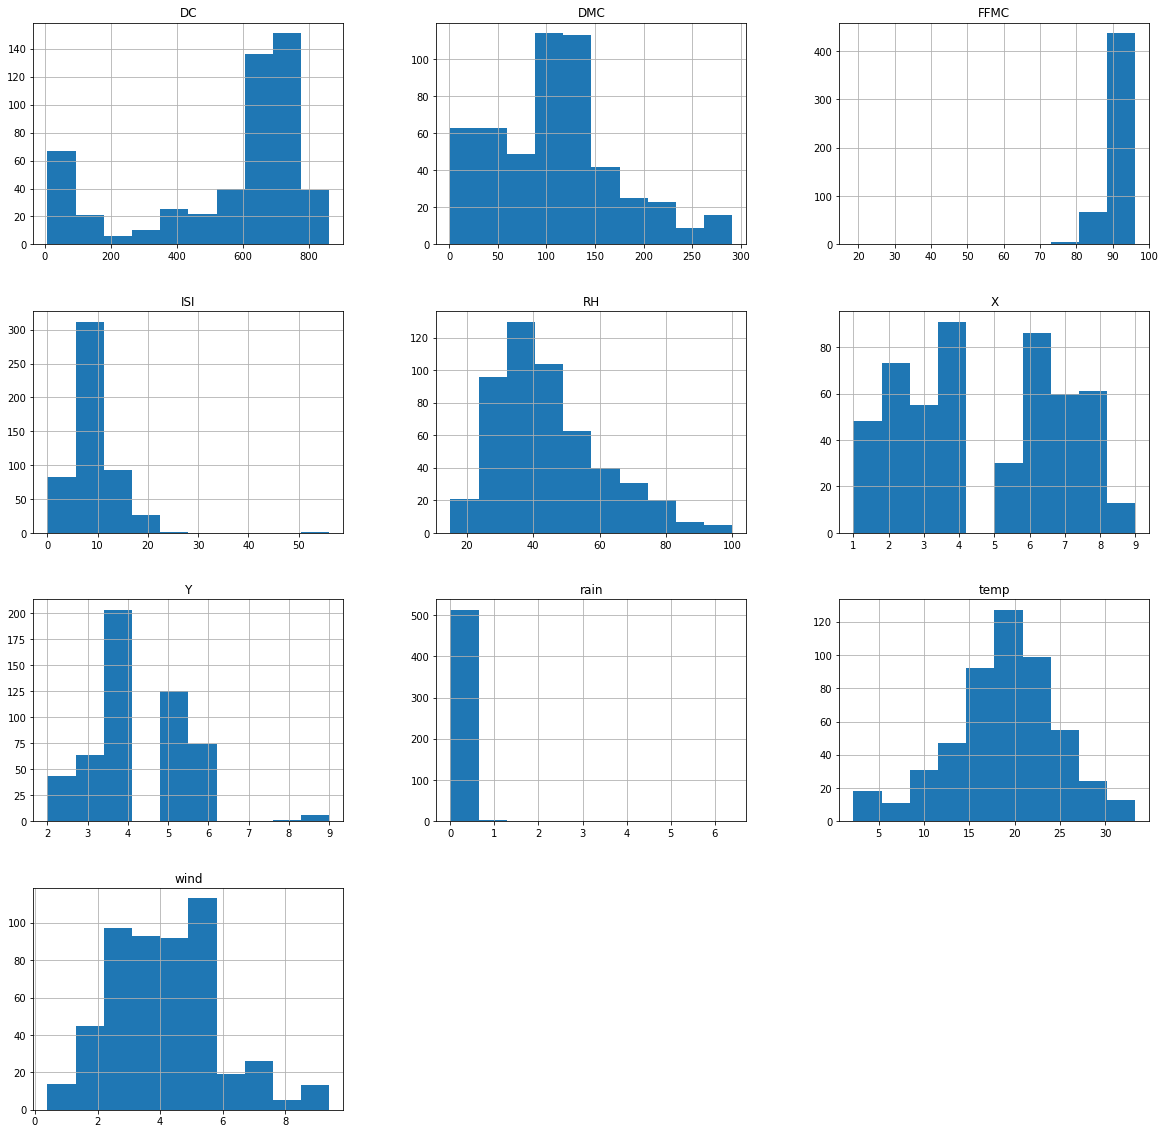

In [44]:
# take a look at the independent variables

df_independent = df.drop('area', 1)
df_independent.hist(figsize = (20, 20))